In [6]:
import pod5
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 12
sys.path.insert(0, '/private/groups/brookslab/gabai/tools/NEMO/src/')
import importlib
from qc import *

In [49]:
dt_outpath = '../data/'
fig_outpath = '../figures/'

### modification score distribution

In [43]:
neg_pred = '../data/prediction/240911_dorado_220308_ang_0.tsv'
pos_pred = '../data/prediction/240911_dorado_220308_ang_500.tsv'
# rep1
chrom_190429_pred = '../data/prediction/240912_dorado_20190429_chrom.tsv'
# rep2
chrom_210615_pred = '../data/prediction/240917_dorado_20210615_full.tsv'
# rep3
chrom_220331_pred = '../data/prediction/240909_dorado_20220331_chrom.tsv'
# spheroplast
chrom_sphe_pred = '../data/prediction/240909_dorado_sphe_using_nuclei_model.tsv'

allpred = [neg_pred, pos_pred, chrom_190429_pred, chrom_210615_pred, chrom_220331_pred, chrom_sphe_pred]
labels = ['negative control', '500uM positive control', 'Nuclei rep1', 'Nuclei rep2', 'Nuclei rep3', 'Spheroplast']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:green', 'tab:green', 'tab:purple']

In [ ]:
mod_scores_pos = []
nreads = ''
for i in range(len(allpred)):
    mod_score_pos = {}
    sample = '_'.join(labels[i].split(' '))
    print(sample)
    outf = open(f'../data/prediction/241202_{sample}_prediction_per_pos.bedgraph', 'w')
    with open(allpred[i], 'r') as infile:
        c=0
        for line in infile:
            c+=1
            if nreads:
                if c>nreads: break
            chrom = line.strip().split('\t')[1]
            if chrom not in mod_score_pos:
                mod_score_pos[chrom] = {}
            start, end = int(line.strip().split('\t')[3]), int(line.strip().split('\t')[4])
            scores = line.strip().split('\t')[-1]
            scores = [float(i) for i in scores.split(',')]
            i = 0
            for pos in range(start, end+1):
                if pos not in mod_score_pos:
                    mod_score_pos[chrom][pos] = [scores[i]]
                else:
                    mod_score_pos[chrom][pos].append(scores[i])
                i+=1
    for chrom in mod_score_pos:
        sorted_scores = sorted(mod_score_pos[chrom].items())
        for pos, scores in sorted_scores:
            outf.write(f'{chrom}\t{pos}\t{pos+1}\t{int(np.median(scores))}\n')
    outf.close()

negative_control
500uM_positive_control
Nuclei_rep1
Nuclei_rep2
Nuclei_rep3


negative_control
start plotting...
500uM_positive_control
start plotting...
Nuclei_rep1
start plotting...


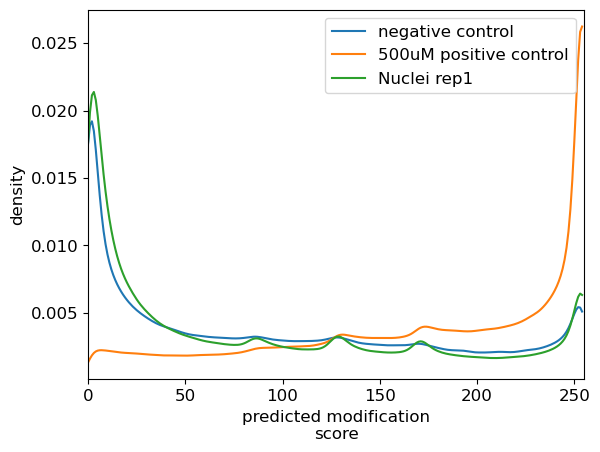

In [51]:
for i in range(len(labels)):
    if labels[i] not in ['negative control', '500uM positive control', 'Nuclei rep1']:
        continue
    all_scores = []
    sample = '_'.join(labels[i].split(' '))
    print(sample)
    with open(f'../data/prediction/241202_{sample}_prediction_per_pos.bedgraph', 'r') as infile:
        for line in infile:
            all_scores.append(int(line.strip().split('\t')[3]))
    print('start plotting...')
    kde = stats.gaussian_kde(all_scores)
    x = np.arange(0, 255, 1)
    density = kde(x)
    # plt.bar(x, density, width=1, color = colors[i], alpha = 0.6)
    plt.plot(x, density, label=labels[i], color = colors[i])

plt.legend()
plt.xticks(np.arange(0, 255, 50))
plt.xlim(0, 255)
plt.xlabel('predicted modification\nscore')
plt.ylabel('density')
plt.savefig(fig_outpath+ f'3_predicted_modification_score_all_pos_distribution.pdf', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(6, 5))
for i in range(len(mod_scores)):
    mod_score = mod_scores[i]
    kde = stats.gaussian_kde(mod_score)
    x = np.arange(0, 255, 5)
    density = kde(x)
    plt.plot(x, density, label=labels[i], color = mycolor[i])
    # plt.bar(x, density, color = mycolor[i], alpha=0.7, width = 0.5)
plt.legend()
plt.xticks(np.arange(0, 255, 50))
plt.xlim(0, 256)
plt.xlabel('predicted modification\nscore per read')
plt.ylabel('density')
plt.savefig(fig_outpath+ f'3_predicted_modification_score__all_pos_distribution.pdf', bbox_inches='tight')

NameError: name 'fig_outpath' is not defined

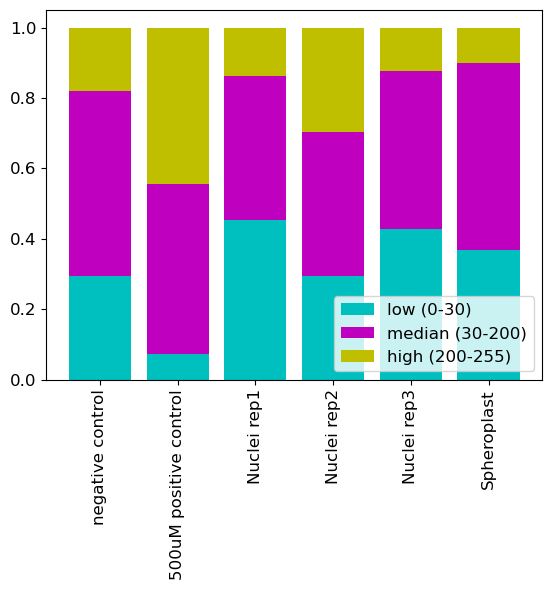

In [17]:
all_counts = []
for i in range(len(mod_scores)):
    mod_score = [mod_scores[i]]
    counts, bin_edges = np.histogram(mod_scores[i], [0, 30, 200, 255])
    all_counts.append(counts)

all_percents = [a/np.sum(a) for a in all_counts]

mod_class = ['low (0-30)', 'median (30-200)', 'high (200-255)']

colors = ['c', 'm', 'y']
for i in range(len(all_percents)):
    bottom = 0
    for j in range(3):
        height = all_percents[i][j]
        if i==0:
            plt.bar(i, height, bottom=bottom, color=colors[j], label=mod_class[j])
        else:
            plt.bar(i, height, bottom=bottom, color=colors[j])
        bottom +=height
plt.xticks(np.arange(0, len(labels), 1), labels, rotation = 90)
plt.legend()
plt.savefig(fig_outpath+ f'3_predicted_modification_score_binsize75.pdf', bbox_inches='tight')

In [ ]:
all_counts = []
for i in range(len(mod_scores)):
    mod_score = mod_scores[i]
    counts, bin_edges = np.histogram(mod_scores[i], np.arange(0, 255+1, 85))
    all_counts.append(counts)
all_percents = [a/np.sum(a) for a in all_counts]

mod_class = ['low (0-85)', 'median (85-170)', 'high (170-255)']

colors = ['c', 'm', 'y']
for i in range(len(all_percents)):
    bottom = 0
    for j in range(3):
        height = all_percents[i][j]
        if i==0:
            plt.bar(i, height, bottom=bottom, color=colors[j], label=mod_class[j])
        else:
            plt.bar(i, height, bottom=bottom, color=colors[j])
        bottom +=height
plt.xticks(np.arange(0, len(labels), 1), labels, rotation = 90)
plt.legend()
plt.savefig(fig_outpath+ f'3_predicted_modification_score_binsize85.pdf', bbox_inches='tight')


plt.figure(figsize=(6, 5))
for i in range(len(mod_scores)):
    mod_score = mod_scores[i]
    kde = stats.gaussian_kde(mod_score)
    x = np.arange(0, 255, 5)
    density = kde(x)
    plt.plot(x, density, label=labels[i], color = mycolor[i])
    # plt.bar(x, density, color = mycolor[i], alpha=0.7, width = 0.5)
plt.legend()
plt.xticks(np.arange(0, 255, 50))
plt.xlim(0, 256)
plt.xlabel('predicted modification\nscore per read')
plt.ylabel('density')
plt.savefig(fig_outpath+ f'3_predicted_modification_score_bin80.pdf', bbox_inches='tight')


labelstoplot = ['negative ctrl', 'positive ctrl', 'nuclei rep1', 'spheroplast']
plt.figure(figsize=(6, 5))
for i in range(len(mod_scores)):
    if labels[i] not in labelstoplot: continue
    mod_score = mean_mod_per_reads[i]
    kde = stats.gaussian_kde(mod_score)
    x = np.arange(0, 255, 1)
    density = kde(x)
    plt.plot(x, density, label=labels[i], color = mycolor[i])
    # plt.bar(x, density, color = mycolor[i], alpha=0.7, width = 0.5)
plt.legend()
plt.xticks(np.arange(0, 255, 50))
plt.xlim(0, 256)
plt.xlabel('predicted modification\nscore per read')
plt.ylabel('density')
plt.savefig(fig_outpath+ f'3_predicted_modification_score_per_read.pdf', bbox_inches='tight')

In [129]:
dt_outpath = '../data/'
fig_outpath = '../figures/'

In [133]:
plt.figure(figsize=(6, 4))
for i in tqdm(range(len(all_mod_scores))):
    print(labels[i])
    plt.hist(all_mod_scores[i], np.arange(0,256, 1), label= labels[i], alpha = 0.6, density = True)
plt.xlabel('predicted modification score')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(fig_outpath+ f'3_all_modification_score_distribution.pdf', bbox_inches='tight')
plt.close()

  0%|                                                                                                             | 0/6 [00:00<?, ?it/s]

nuclei negative ctrl


 17%|████████████████▊                                                                                    | 1/6 [00:00<00:02,  2.44it/s]

nuclei positive ctrl


 33%|█████████████████████████████████▋                                                                   | 2/6 [00:00<00:01,  2.64it/s]

nuclei chromatin 220331


 50%|██████████████████████████████████████████████████▌                                                  | 3/6 [00:01<00:01,  2.46it/s]

nuclei chromatin 210615


 67%|███████████████████████████████████████████████████████████████████▎                                 | 4/6 [00:02<00:01,  1.09it/s]

nuclei chromatin 190815


 83%|████████████████████████████████████████████████████████████████████████████████████▏                | 5/6 [00:03<00:00,  1.44it/s]

nuclei chromatin 190429


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.65it/s]


In [136]:
datatoplot = ['nuclei negative ctrl', 'nuclei positive ctrl', 'nuclei chromatin 220331']
plt.figure(figsize=(6, 4))
for i in tqdm(range(len(all_mod_scores))):
    if labels[i] not in datatoplot: continue
    plt.hist(all_mod_scores[i], np.arange(0,256, 1), label= labels[i], alpha = 0.6, density = True)
plt.xlabel('predicted modification score')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(fig_outpath+ f'3_nuclei_0331_modification_score_distribution.pdf', bbox_inches='tight')
plt.close()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.06it/s]


In [ ]:
labels = ['nuclei negative ctrl', 'nuclei positive ctrl', 'nuclei chromatin 220331', 'nuclei chromatin 210615', 'nuclei chromatin 190815', 'nuclei chromatin 190429']

In [137]:
datatoplot = ['nuclei negative ctrl', 'nuclei positive ctrl', 'nuclei chromatin 210615']
plt.figure(figsize=(6, 4))
for i in tqdm(range(len(all_mod_scores))):
    if labels[i] not in datatoplot: continue
    plt.hist(all_mod_scores[i], np.arange(0,256, 1), label= labels[i], alpha = 0.6, density = True)
plt.xlabel('predicted modification score')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(fig_outpath+ f'3_nuclei_0615_modification_score_distribution.pdf', bbox_inches='tight')
plt.close()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.07it/s]


In [139]:
datatoplot = ['nuclei negative ctrl', 'nuclei positive ctrl', 'nuclei chromatin 190815']
plt.figure(figsize=(6, 4))
for i in tqdm(range(len(all_mod_scores))):
    if labels[i] not in datatoplot: continue
    plt.hist(all_mod_scores[i], np.arange(0,256, 1), label= labels[i], alpha = 0.6, density = True)
plt.xlabel('predicted modification score')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(fig_outpath+ f'3_nuclei_0815_modification_score_distribution.pdf', bbox_inches='tight')
plt.close()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.57it/s]


In [140]:
datatoplot = ['nuclei negative ctrl', 'nuclei positive ctrl', 'nuclei chromatin 190429']
plt.figure(figsize=(6, 4))
for i in tqdm(range(len(all_mod_scores))):
    if labels[i] not in datatoplot: continue
    plt.hist(all_mod_scores[i], np.arange(0,256, 1), label= labels[i], alpha = 0.6, density = True)
plt.xlabel('predicted modification score')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(fig_outpath+ f'3_nuclei_0429_modification_score_distribution.pdf', bbox_inches='tight')
plt.close()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.16it/s]


### Aggregated modification score at tss control

In [3]:
pos_agg = '../data/prediction/aggregate/240911_dorado_220308_ang_500_window2000_nuc_aggregate_score.tsv'
neg_agg = '../data/prediction/aggregate/240911_dorado_220308_ang_0_window2000_nuc_aggregate_score.tsv'

In [4]:
allagg = [neg_agg, pos_agg]
labels = ['negative ctrl', 'positive ctrl']

In [5]:
plt.figure(figsize=(6,4))
hw = int(2000/2)
space=150

for i in range(len(allagg)):
    agg_scores = []
    with open(allagg[i], 'r') as infile:
        for line in infile:
            line = line.strip().split('\t')
            agg_scores.append(float(line[1]))
    plt.plot(np.arange(-hw, hw+1), agg_scores, label = labels[i], alpha=1)

x_ticks = np.concatenate((np.flip(np.arange(0, -hw-1, -space)[1:]), np.arange(0, hw+1, space)), axis=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(alpha=0.5,axis = 'x')
plt.xticks(x_ticks, rotation = 90)
plt.xlabel('distance to +1 nucleosome')
plt.ylabel('predicted modification score')
plt.savefig(fig_outpath+ f'3_control_data_at_nuc_window2000.pdf', bbox_inches='tight')
plt.close()

NameError: name 'plt' is not defined